# Explore here

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
X = total_data[["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

model = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [5]:
X_train["cluster"] = list(model.labels_)
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


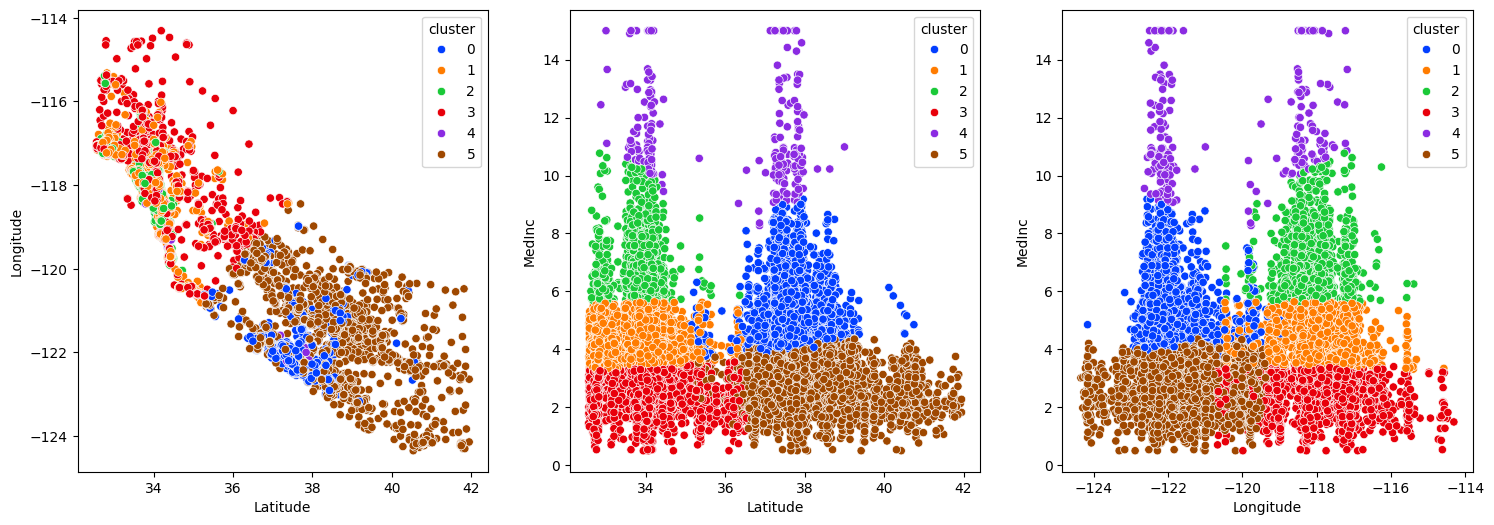

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 3, figsize = (18, 6))
sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright")
plt.show()

In [10]:
X_test["cluster"] = list(model.predict(X_test))

X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


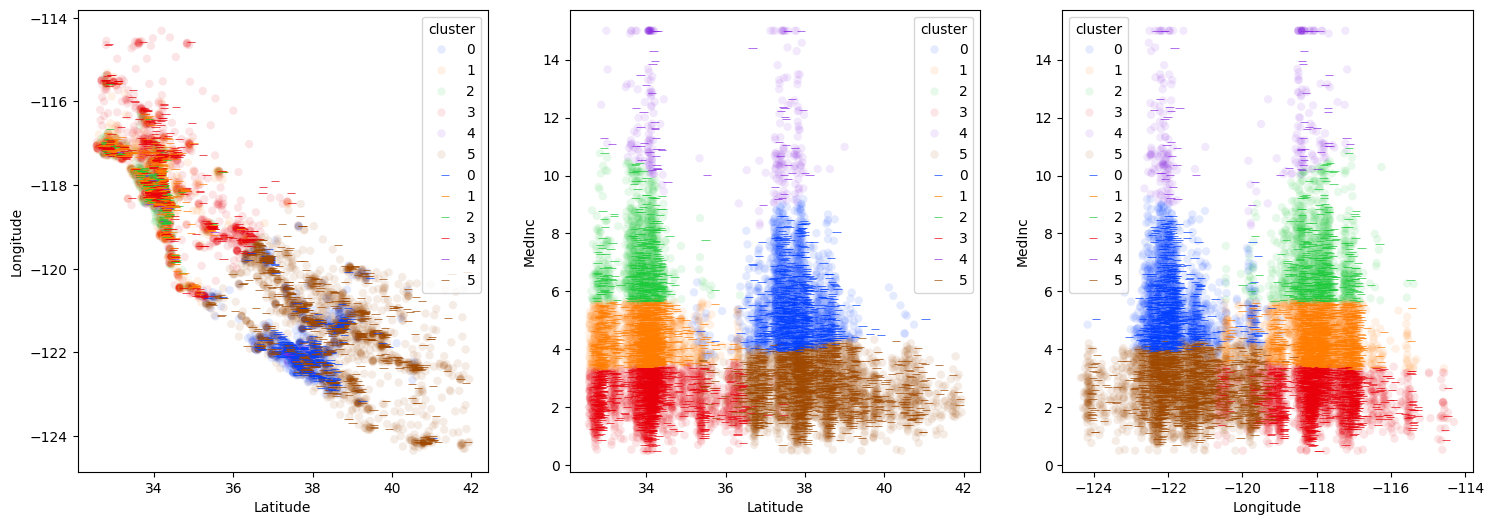

In [15]:
fig, axis = plt.subplots(1, 3, figsize = (18, 6))
sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright", alpha=0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright", alpha=0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright",alpha=0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright", marker=1)
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright", marker=1)
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright",marker=1)

plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier
y_train =  X_train["cluster"]
model2 = DecisionTreeClassifier(random_state = 42)
model2.fit(X_train.drop(columns=["cluster"]), y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = model2.predict(X_test.drop(columns="cluster"))
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(X_test["cluster"], y_pred)

0.9951550387596899

In [ ]:
from pickle import dump

dump(model, open("../models/k-means_6_42.sav", "wb"))
dump(model2, open("../models/destree_6_42.sav", "wb"))